In [2]:
from tree.base import DecisionTree
import pandas as pd
import numpy as np



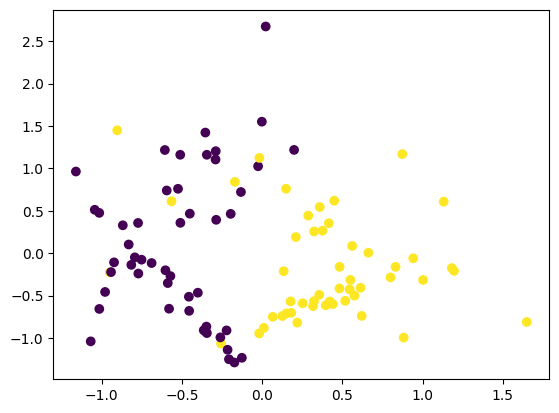

In [3]:
from sklearn.datasets import make_classification
X, y = make_classification(
n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=2, class_sep=0.5)

# For plotting
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y)

In [43]:
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
# training the decision tree
dt = DecisionTree(criterion='information_gain', max_depth=3)
# spliting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pd.DataFrame(X), pd.Series(y), test_size=0.3, random_state=42)
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
# calculating accuracy
from metrics import *

print("Accuracy: ", accuracy(y_test, y_pred))
print("Precision for class 0: ", precision(y_test, y_pred,0))
print("Recall for class 0 ", recall(y_test, y_pred,0))
print("Precision for class 1: ", precision(y_test, y_pred,1))
print("Recall for class 1 ", recall(y_test, y_pred,1))
print(type(accuracy(y_test, y_pred)))

Accuracy:  0.8666666666666667
Precision for class 0:  0.9333333333333333
Recall for class 0  0.8235294117647058
Precision for class 1:  0.8
Recall for class 1  0.9230769230769231
<class 'numpy.float64'>


In [34]:
len(X)


100

In [47]:
max_depth = [1, 2, 3, 4, 5,6,7,8,9,10]
n_folds=5
fold_size = len(X) // n_folds
accuracies = []

for i in max_depth:
    for j in range(n_folds):
        # Handle the last fold specially to include all remaining samples
        if j == n_folds - 1:
            test_start = j * fold_size
            test_end = len(X)  # Include all remaining samples
        else:
            test_start = j * fold_size
            test_end = (j + 1) * fold_size
        
        # print(f"Fold {j+1}: test_start={test_start}, test_end={test_end}, test_size={test_end-test_start}")
        
        # Split the data
        X_test = X[test_start:test_end]
        y_test = y[test_start:test_end]
        X_train = np.concatenate((X[:test_start], X[test_end:]), axis=0)
        y_train = np.concatenate((y[:test_start], y[test_end:]), axis=0)
        
        # Reset indices to avoid misalignment
        X_train = pd.DataFrame(X_train).reset_index(drop=True)
        y_train = pd.Series(y_train).reset_index(drop=True)
        X_test = pd.DataFrame(X_test).reset_index(drop=True)
        y_test = pd.Series(y_test).reset_index(drop=True)
        
        # print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")
        
        # Train and evaluate the decision tree
        dt = DecisionTree(criterion='information_gain', max_depth=i)
        dt.fit(X_train, y_train)
        y_pred = dt.predict(X_test)
        
        acc = accuracy(y_test, y_pred)
        # print(f"Max depth {i}, Fold {j+1}, Accuracy: {acc}")
        accuracies.append((acc, i, j+1))

In [48]:
accpd=pd.DataFrame(accuracies,columns=["Accuracy","Max_Depth","Fold"])
accpd

,Accuracy,Max_Depth,Fold
0,0.90,1,1
1,0.85,1,2
2,0.90,1,3
3,0.85,1,4
4,0.95,1,5
5,0.90,2,1
6,0.95,2,2
7,0.90,2,3
8,0.85,2,4
9,0.95,2,5
